In [1]:
import numpy as np
import pandas as pd
import harmonica as hm
import matplotlib.pyplot as plt
import verde as vd

# Setting up Data

In [2]:
IBR = pd.read_csv('pointmaps/Ice_Bridge.csv')

In [38]:
CCC = IBR.loc[0:10000,:]
CCC

,Unnamed: 0,line,easting,northing,height,levelling_correction,free_air_gravity_70s,free_air_gravity_100s,free_air_gravity_140s
0,0,1,-1607779.38,-664002.11,2009.76,-27.22,-25.44,-22.90,2.571
1,1,1,-1607716.48,-664037.89,2007.32,-27.28,-25.52,-22.93,2.636
2,2,1,-1607653.90,-664074.24,2004.90,-27.33,-25.59,-22.96,2.681
3,3,1,-1607591.63,-664111.16,2002.50,-27.37,-25.65,-22.98,2.701
4,4,1,-1607529.69,-664148.65,2000.14,-27.41,-25.72,-23.01,2.696
...,...,...,...,...,...,...,...,...,...
9996,9996,1,-1326720.26,-1119190.69,514.78,-40.70,-40.19,-40.02,2.539
9997,9997,1,-1326777.53,-1119156.79,514.63,-40.65,-40.14,-39.97,2.542
9998,9998,1,-1326834.38,-1119122.41,514.45,-40.61,-40.10,-39.92,2.547
9999,9999,1,-1326890.81,-1119087.57,514.26,-40.56,-40.05,-39.87,2.554


In [39]:
coordinates = CCC[['easting', 'northing', 'height']].values

gravity_anomaly = CCC['free_air_gravity_70s'].values

In [48]:
coordinates = np.array(CCC[['easting', 'northing', 'height']])
gravity_anomaly = np.array(CCC['free_air_gravity_70s'])

In [49]:
# min,max values for region
easting_min, easting_max = CCC['easting'].min(), CCC['easting'].max()
northing_min, northing_max = CCC['northing'].min(), CCC['northing'].max()

# Define the region and grid spacing
region = [easting_min, easting_max, northing_min, northing_max]
shape = (100, 100)  # e.g., (100, 100)
grid_coordinates = vd.grid_coordinates(region, shape=shape, extra_coords=-CCC['height'].mean())

# Equivalent sources Interpolation with 10001 data points

In [6]:
equivalent_sources = hm.EquivalentSources(damping=1e-6)
equivalent_sources

,damping,1e-06
,points,None
,depth,'default'
,block_size,None
,parallel,True
,dtype,'float64'


In [71]:
# Fit the model
equivalent_sources.fit(coordinates.T, gravity_anomaly)


,damping,1e-06
,points,None
,depth,'default'
,block_size,None
,parallel,True
,dtype,'float64'


In [72]:
# Predict interpolated gravity
interpolated_gravity = equivalent_sources.predict(grid_coordinates)

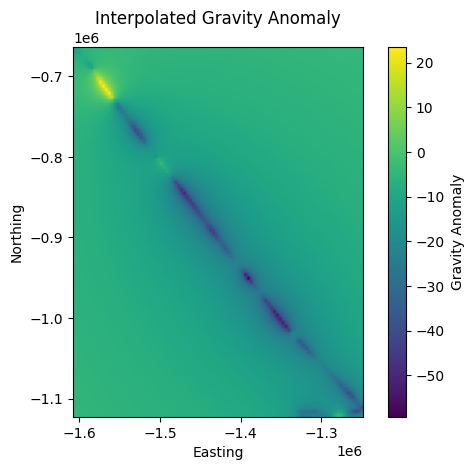

In [61]:
plt.imshow(interpolated_gravity.reshape(shape), extent=region, origin='lower')
plt.colorbar(label='Gravity Anomaly')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Interpolated Gravity Anomaly')
plt.show()

In [70]:
# Build the grid coordinates
grid_coords = vd.grid_coordinates(region=region, spacing=2e3, extra_coords=2.2e3)

# Grid the gravity disturbances
grid = equivalent_sources.grid(grid_coords, data_names=["gravity_disturbance"])
grid

<xarray.Dataset> Size: 669kB
Dimensions:              (northing: 230, easting: 181)
Coordinates:
  * northing             (northing) float64 2kB -1.122e+06 ... -6.64e+05
  * easting              (easting) float64 1kB -1.608e+06 ... -1.248e+06
    upward               (northing, easting) float64 333kB 2.2e+03 ... 2.2e+03
Data variables:
    gravity_disturbance  (northing, easting) float64 333kB -4.801 ... -4.299
Attributes:
    metadata:  Generated by EquivalentSources(damping=1e-06)

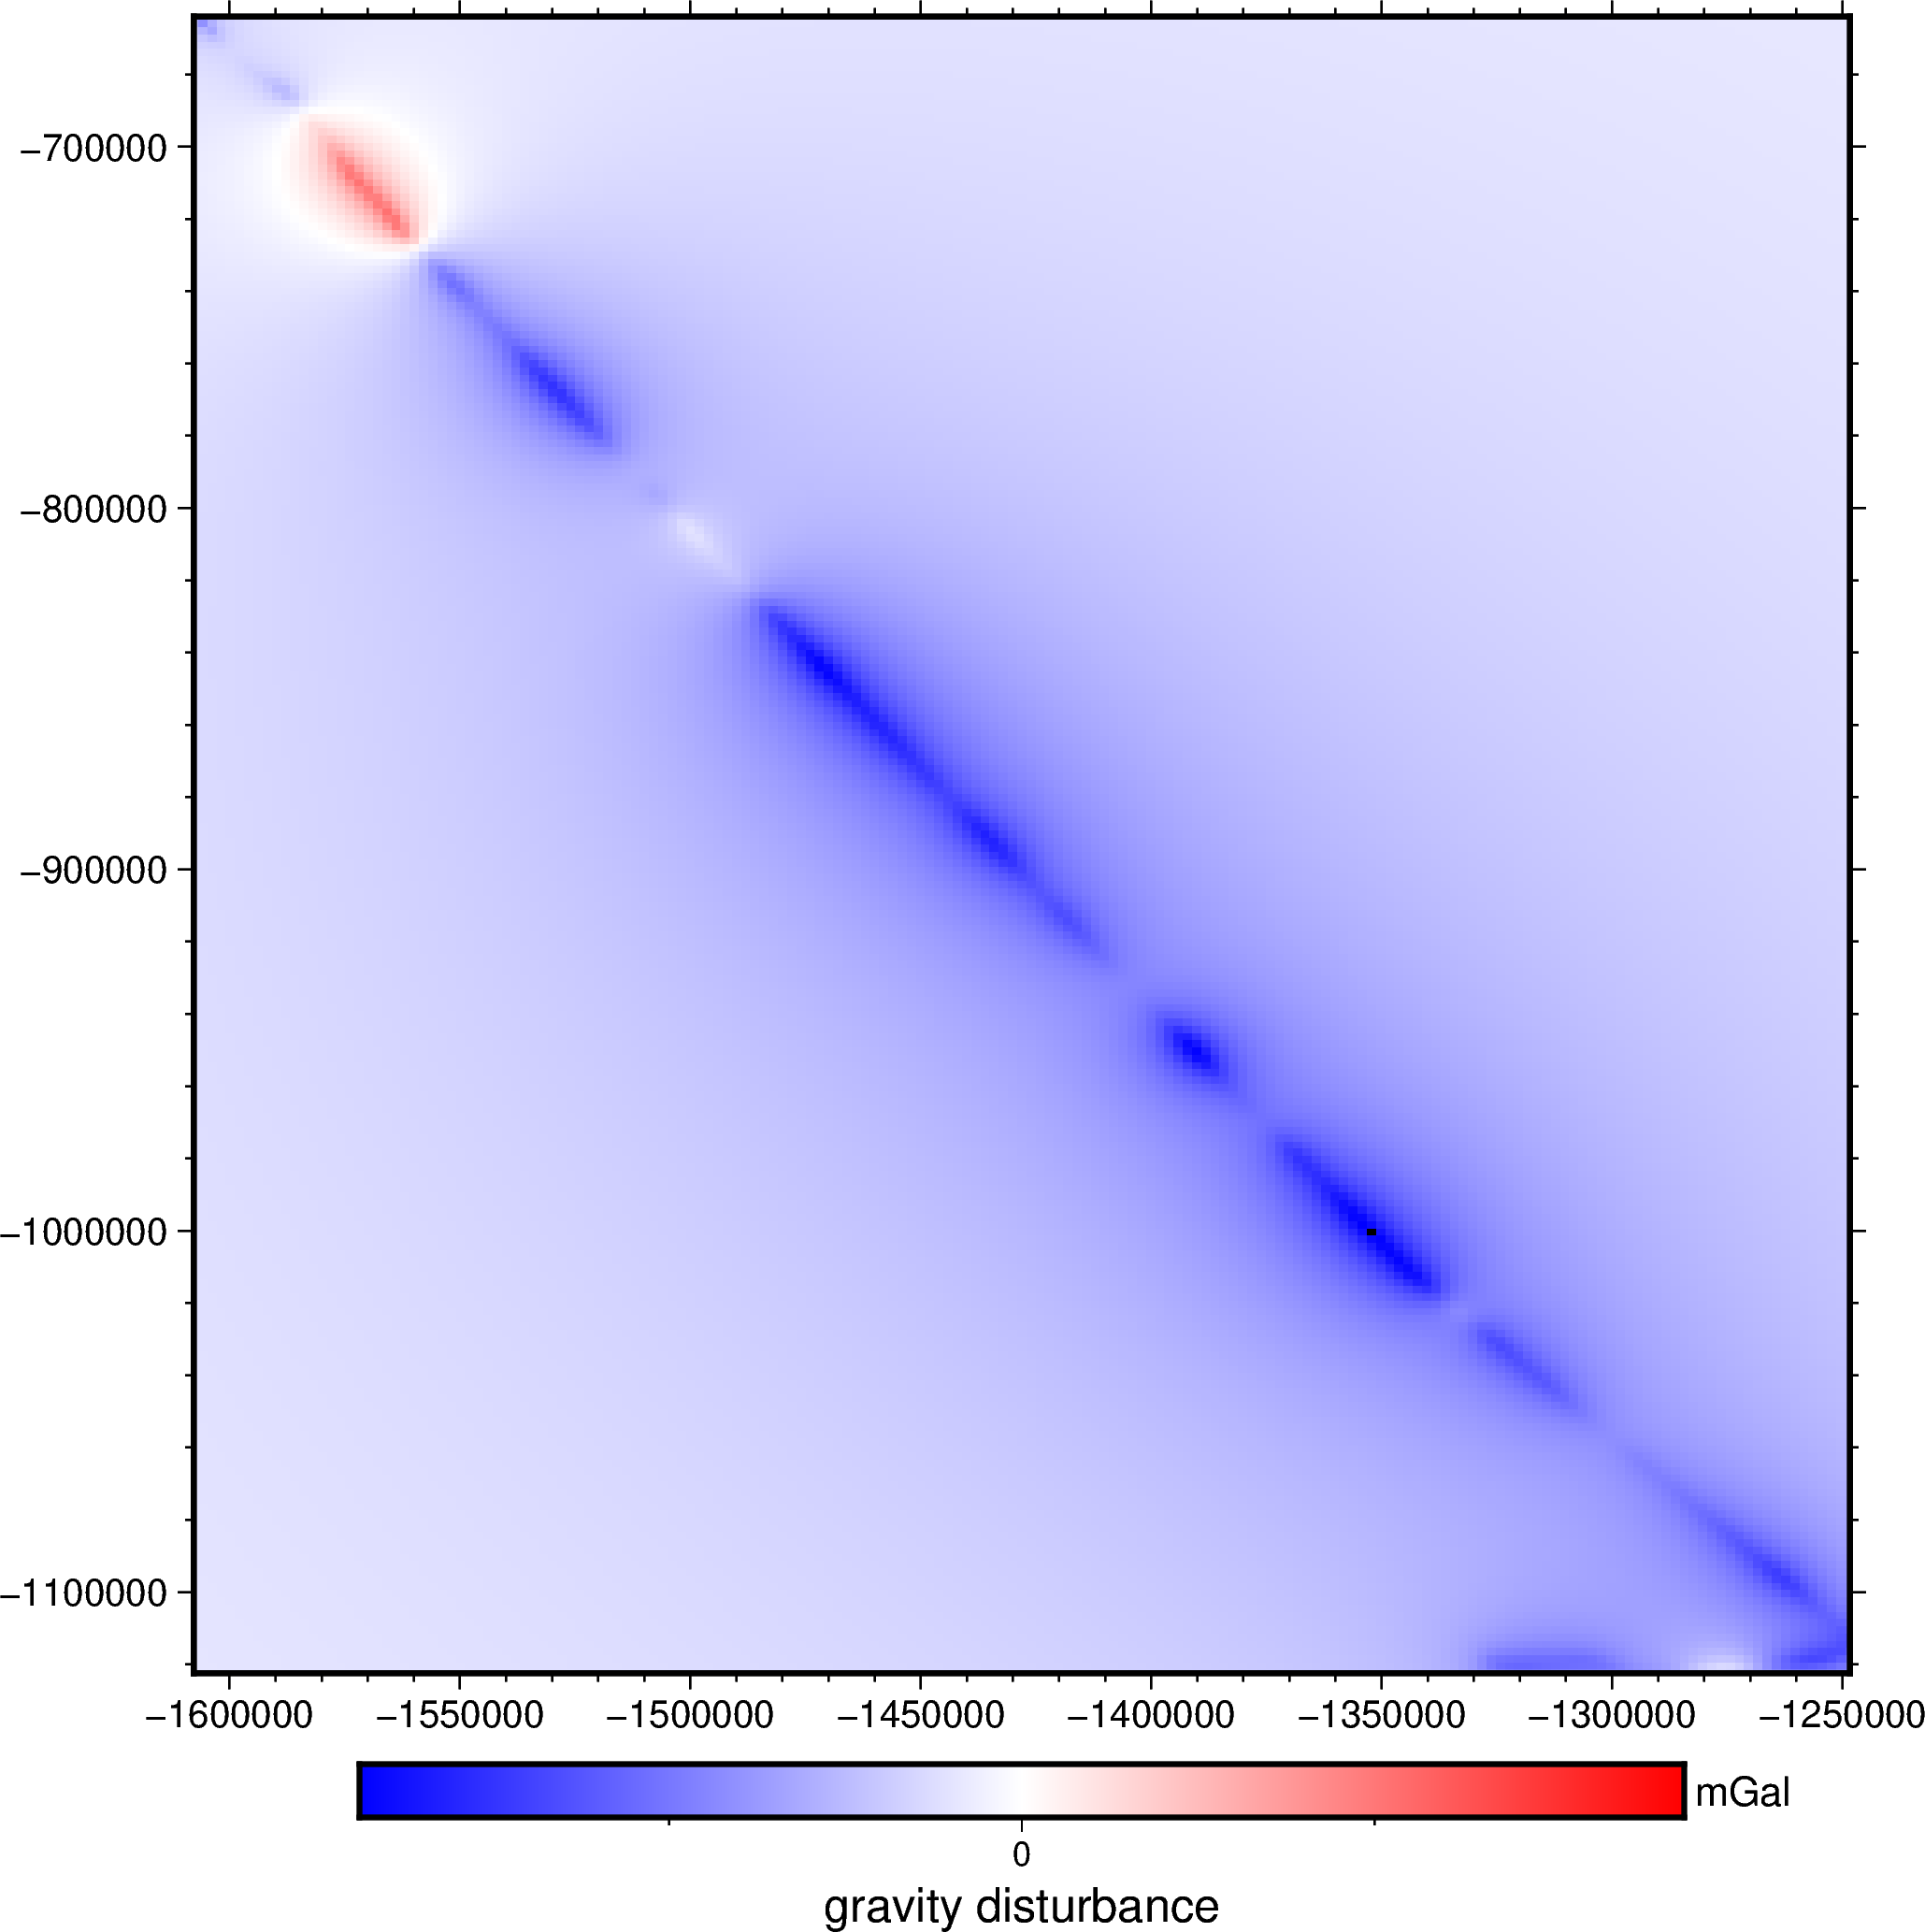

In [66]:
maxabs = vd.maxabs(grid.gravity_disturbance)

fig = pygmt.Figure()
pygmt.makecpt(cmap="polar+h0", series=[-maxabs, maxabs])
fig.grdimage(
   frame=['af', 'WSen'],
   grid=grid.gravity_disturbance,
   region=region,
   #projection=fig_proj,
   cmap=True,
)
fig.colorbar(cmap=True, frame=["a50f25", "x+lgravity disturbance", "y+lmGal"])

fig.show()

In [69]:
grid.to_netcdf('pointmaps/Flight_Line_grid.nc')

# Equivalent sources Interpolation with complete Data

In [7]:
CCC = IBR

In [8]:
coordinates = np.array(CCC[['easting', 'northing', 'height']])
gravity_anomaly = np.array(CCC['free_air_gravity_70s'])

In [9]:
# min,max values for region
easting_min, easting_max = CCC['easting'].min(), CCC['easting'].max()
northing_min, northing_max = CCC['northing'].min(), CCC['northing'].max()

# Define the region and grid spacing
region = [easting_min, easting_max, northing_min, northing_max]
shape = (100, 100)  # e.g., (100, 100)
grid_coordinates = vd.grid_coordinates(region, shape=shape, extra_coords=-CCC['height'].mean())

In [10]:
# Fit the model
equivalent_sources.fit(coordinates.T, gravity_anomaly)

MemoryError: Unable to allocate 613. GiB for an array with shape (286821, 286821) and data type float64